In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
from torch.utils.data import DataLoader

import warnings
warnings.filterwarnings('ignore')

from torchsummary import summary
from train_models import ClassifierTrainer, RegressorTrainer

In [2]:
train_transformer = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
val_transformer = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [3]:
train_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/train',
    transform=train_transformer
)

val_dataset = datasets.ImageFolder(
    'data/Module_3_Lecture_2_hymenoptera_data/val',
    transform=val_transformer
)

In [4]:
train_loader = DataLoader(
    train_dataset,
    batch_size=32,  
    shuffle=True,   
    num_workers=0   
)
val_loader = DataLoader(
    val_dataset,
    batch_size=32, 
    shuffle=False, 
    num_workers=0
)

In [5]:
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print("Використовується пристрій:", device)

Використовується пристрій: mps


In [6]:
model_ft = models.resnet18(weights='IMAGENET1K_V1')
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.Adam(model_ft.parameters(), lr=1e-05)

In [ ]:
trainer = ClassifierTrainer(model=model_ft,
                            criterion=criterion,
                            optimizer=optimizer_ft,
                            num_classes=2,
                            device='mps')

trainer.fit(train_loader,
            val_loader,
            num_epoch=10,
            info_every_iter=True,
            show_val_metrics=False)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 52.6137 Acc: 0.5369 Rec: 0.1405 Prec: 0.6538
Epoch [2/10] Train Loss: 50.5859 Acc: 0.6311 Rec: 0.2727 Prec: 0.9429
Epoch [3/10] Train Loss: 49.4799 Acc: 0.7090 Rec: 0.4132 Prec: 1.0000
Epoch [4/10] Train Loss: 48.6864 Acc: 0.7500 Rec: 0.5289 Prec: 0.9412
Epoch [5/10] Train Loss: 47.4872 Acc: 0.8115 Rec: 0.6364 Prec: 0.9747
Epoch [6/10] Train Loss: 46.7956 Acc: 0.8648 Rec: 0.7521 Prec: 0.9681
Epoch [7/10] Train Loss: 47.0623 Acc: 0.8852 Rec: 0.7686 Prec: 1.0000
Epoch [8/10] Train Loss: 46.1997 Acc: 0.8811 Rec: 0.7769 Prec: 0.9792
Epoch [9/10] Train Loss: 46.0546 Acc: 0.8934 Rec: 0.7934 Prec: 0.9897


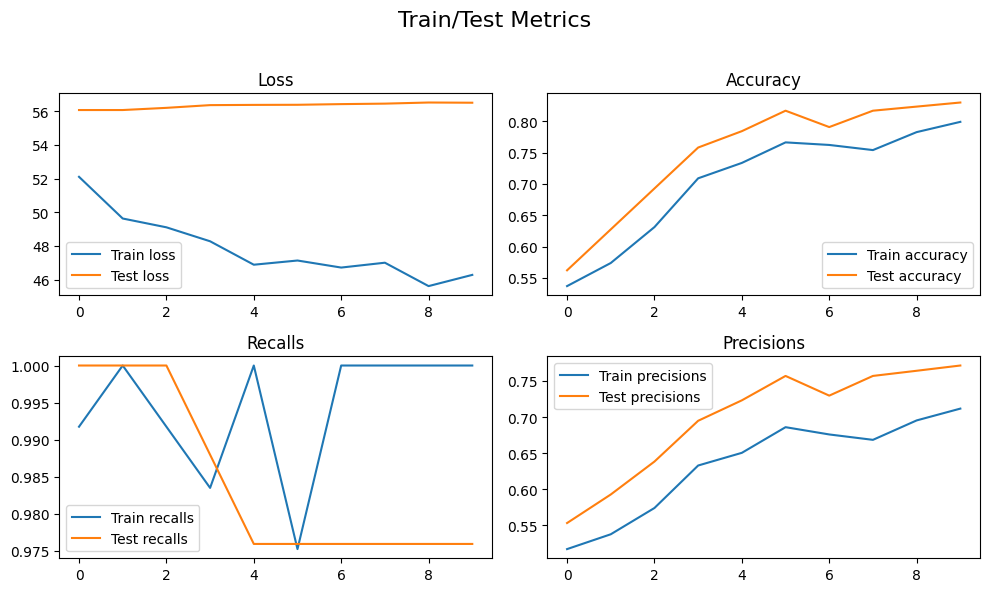

In [ ]:
trainer.plot_metrics()

In [ ]:
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')
params = list(model_conv.parameters())
for param in params[:-10]:
    param.requires_grad = False

num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

criterion = nn.CrossEntropyLoss()
optimizer_conv = optim.Adam(model_conv.fc.parameters(), lr=1e-03)

In [ ]:
summary(model_conv, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]          36,864
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
       BasicBlock-11           [-1, 64, 56, 56]               0
           Conv2d-12           [-1, 64, 56, 56]          36,864
      BatchNorm2d-13           [-1, 64, 56, 56]             128
             ReLU-14           [-1, 64,

In [ ]:
model_conv

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
trainer = ClassifierTrainer(model=model_conv,
                            criterion=criterion,
                            optimizer=optimizer_conv,
                            num_classes=2,
                            device='cpu')

trainer.fit(train_loader,
            val_loader,
            num_epoch=10,
            info_every_iter=True,
            show_val_metrics=False)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch [1/10] Train Loss: 52.4138 Acc: 0.5984 Rec: 0.6446 Prec: 0.5865
Epoch [2/10] Train Loss: 49.3345 Acc: 0.6762 Rec: 0.9835 Prec: 0.6071
Epoch [3/10] Train Loss: 48.2139 Acc: 0.6516 Rec: 1.0000 Prec: 0.5874
Epoch [4/10] Train Loss: 48.4119 Acc: 0.7131 Rec: 1.0000 Prec: 0.6335
Epoch [5/10] Train Loss: 48.1010 Acc: 0.8197 Rec: 0.9835 Prec: 0.7391
Epoch [6/10] Train Loss: 47.6429 Acc: 0.9098 Rec: 0.9421 Prec: 0.8837
Epoch [7/10] Train Loss: 46.9935 Acc: 0.9221 Rec: 0.9256 Prec: 0.9180
Epoch [8/10] Train Loss: 46.5868 Acc: 0.9467 Rec: 0.9587 Prec: 0.9355
Epoch [9/10] Train Loss: 46.0789 Acc: 0.9344 Rec: 0.9587 Prec: 0.9134
Epoch [10/10] Train Loss: 47.0033 Acc: 0.9098 Rec: 0.9091 Prec: 0.9091


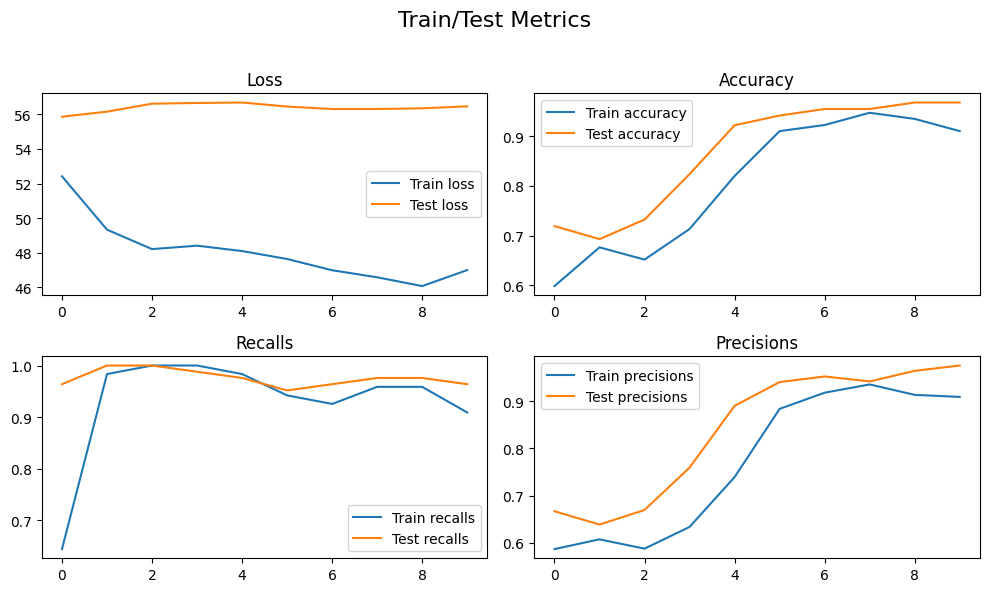

In [ ]:
trainer.plot_metrics()